In [9]:
import pandas as pd

# Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Evaluation of the Sentiment Analysis
from sklearn.metrics._classification import classification_report
from sklearn.metrics._classification import confusion_matrix
from sklearn.metrics._classification import f1_score
from sklearn.metrics import ConfusionMatrixDisplay

In [10]:
# List of the crators that are part of the sample for the evaluation: MKBHD, Jeremy Jahns, James Charles
creator = "MKBHD" # Put the name of the creator here
output_df = pd.read_excel(f"../comments_spreadsheets/sample_extracted_comments_{creator}.xlsx")

In [11]:
duplicates = output_df[output_df.duplicated(("Comments"))]
print ("Count of duplicate comments in dataframe"
, duplicates.shape[0])

print ("Count of unique comments in dataframe"
, output_df.shape[0] - duplicates.shape[0])

# Remove duplicated comments from dataset
unique_df = output_df.drop_duplicates(subset=["Comments"], keep='first')
df = unique_df.reset_index()

# Removes line return "\n"
df = df.replace(r'\n',' ', regex=True)

display(df)

Count of duplicate comments in dataframe 0
Count of unique comments in dataframe 98


,index,Video ID,Comments,Actual Polarity
0,0,eWI_BtcDJu0,I like the blue this time. But will wait for 1...,Neutral
1,1,eWI_BtcDJu0,I love to watch reviews of my phone just to co...,Positive
2,2,eWI_BtcDJu0,I've been watching an endless amount of videos...,Positive
3,3,eWI_BtcDJu0,Another fantastic review! Thank you mr Marcus....,Positive
4,4,eWI_BtcDJu0,Those intro shots man 👌,Positive
...,...,...,...,...
93,93,eWI_BtcDJu0,"I got the pro because of ProRaw, it’s awesome ...",Positive
94,94,eWI_BtcDJu0,"""They catch more fingerprints than the CSI emp...",Positive
95,95,eWI_BtcDJu0,i think apple must have changed their pricing ...,Neutral
96,96,eWI_BtcDJu0,I’m currently on a Xs I’m wayy too attached to...,Neutral


# Sentiment Analysis

In [12]:
sentimentAnalyser = SentimentIntensityAnalyzer()
sentimentScoreList = []
sentimentLabelList = []

for i in df["Comments"].values.tolist():
    sentimentScore = sentimentAnalyser.polarity_scores(i)

    if sentimentScore['compound'] >= 0.05:
        sentimentScoreList.append(sentimentScore['compound'])
        sentimentLabelList.append('Positive')
    elif sentimentScore['compound'] > -0.05 and sentimentScore['compound'] < 0.05:
        sentimentScoreList.append(sentimentScore['compound'])
        sentimentLabelList.append('Neutral')
    elif sentimentScore['compound'] <= -0.05:
        sentimentScoreList.append(sentimentScore['compound'])
        sentimentLabelList.append('Negative')

df["Sentiment"] = sentimentLabelList
df["Sentiment Score"] = sentimentScoreList

In [13]:
numbersOfPositiveComments = df[df["Sentiment"] == "Positive"].shape[0]
numbersOfNegativeComments = df[df["Sentiment"] == "Negative"].shape[0]
numbersOfNeutralComments = df[df["Sentiment"] == "Neutral"].shape[0]

# # Display the number of positive, negative and neutral comments
print ("Number of positive comments: ", numbersOfPositiveComments)
print ("Number of negative comments: ", numbersOfNegativeComments)
print ("Number of neutral comments: ", numbersOfNeutralComments)

# Display the percentage of positive, negative and neutral comments
print ("Percentage of positive comments: ", numbersOfPositiveComments / df.shape[0] * 100)
print ("Percentage of negative comments: ", numbersOfNegativeComments / df.shape[0] * 100)
print ("Percentage of neutral comments: ", numbersOfNeutralComments / df.shape[0] * 100)

Number of positive comments:  78
Number of negative comments:  12
Number of neutral comments:  8
Percentage of positive comments:  79.59183673469387
Percentage of negative comments:  12.244897959183673
Percentage of neutral comments:  8.16326530612245


# Sentiment Analysis Evaluation

              precision    recall  f1-score   support

    Negative       0.42      0.50      0.45        10
     Neutral       0.62      0.18      0.28        28
    Positive       0.72      0.93      0.81        60

    accuracy                           0.67        98
   macro avg       0.59      0.54      0.51        98
weighted avg       0.66      0.67      0.62        98


0.6226416785422998


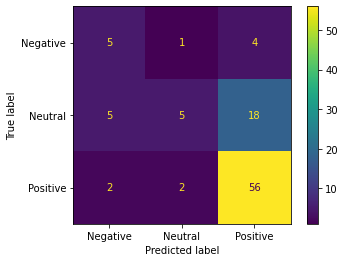

In [14]:
y_actual = df["Actual Polarity"].tolist()
y_predicted = df['Sentiment'].tolist()

confusionMatrix = confusion_matrix(y_actual, y_predicted)
disp = ConfusionMatrixDisplay(confusionMatrix, display_labels=['Negative', 'Neutral', 'Positive'])
disp.plot()
print(classification_report(y_actual, y_predicted, labels=['Negative', 'Neutral', 'Positive']))
print()
print(f1_score(y_actual, y_predicted, labels=['Negative', 'Neutral', 'Positive'], average='weighted'))